<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/GeoMap_Code_Question_2_b_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!pip install git+https://github.com/OpenHydrology/lmoments3.git
!pip install cftime
!pip install netCDF4

  Cloning https://github.com/OpenHydrology/lmoments3.git to /tmp/pip-req-build-kmj8_up7
  Running command git clone --filter=blob:none --quiet https://github.com/OpenHydrology/lmoments3.git /tmp/pip-req-build-kmj8_up7
  Resolved https://github.com/OpenHydrology/lmoments3.git to commit 7e19f97c23019ca68cbd526b8bd417c412438f1c
  Preparing metadata (setup.py) ... done


In [32]:
import lmoments3 as lm
from lmoments3 import distr
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import glob
import os
import cftime
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')

In [33]:
historical_fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc"
historical_ds = xr.open_dataset(historical_fn, engine="netcdf4")

historical_ds['lon'] = xr.where(historical_ds['lon'] > 180, historical_ds['lon'] - 360, historical_ds['lon'])
historical_ds = historical_ds.sortby('lon')

future_fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_ssp585_r1i1p1f1_gn_20150101-21001231.nc"
future_ds = xr.open_dataset(future_fn, engine="netcdf4")

future_ds['lon'] = xr.where(future_ds['lon'] > 180, future_ds['lon'] - 360, future_ds['lon'])
future_ds = future_ds.sortby('lon')

In [34]:
historical_date = '1850-01-01'
historical_tas = historical_ds.sel(time=historical_date)

future_date = '2015-01-01'
future_tas = future_ds.sel(time=future_date)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

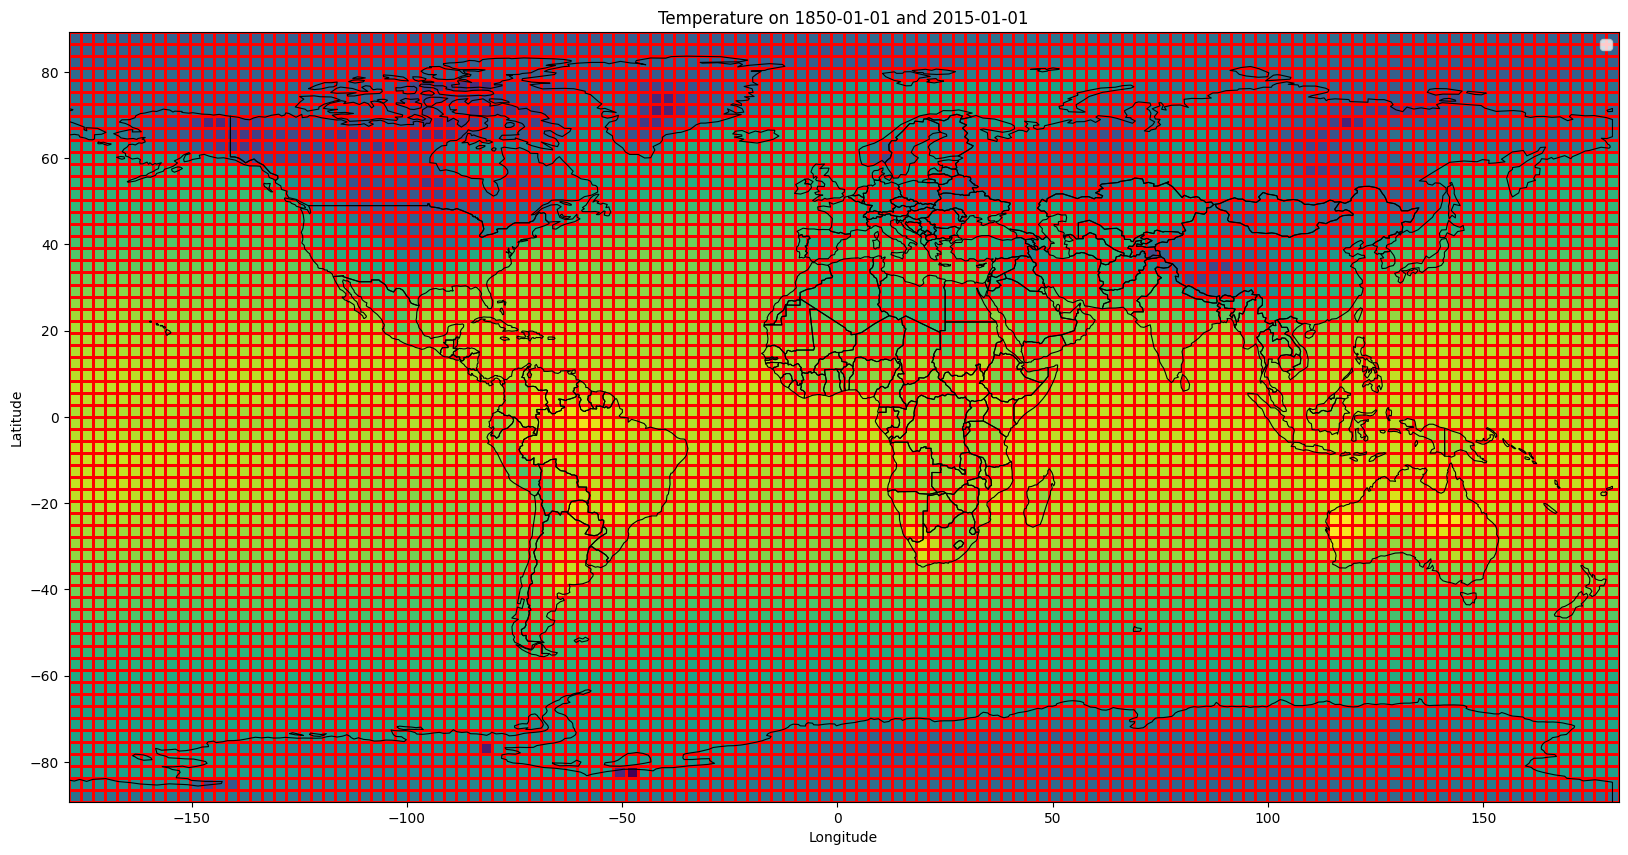

In [37]:
plt.figure(figsize=[20, 12])
world.boundary.plot(ax=plt.gca(), linewidth=0.8, color='k')
historical_tas['tas'].plot(label='Historical', color='blue', add_colorbar=False)
future_tas['tas'].plot(label='Future', color='red', add_colorbar=False)
plt.legend()
plt.title(f'Temperature on {historical_date} and {future_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()